In [1]:
# 1

########## 22 March 2019 ##########
# In this notebook, we're taking the highly-reliable
# C-rich and O-rich AGB stars from the NGC 6822
# master catalog and plotting the C/O ratio 
# as a function of position in the galaxy.


In [2]:
# 2

# First thing needed is to import the relevant Python libraries.

import numpy as np
import pandas as pd
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u


In [3]:
# 3

MASTERCAT = pd.read_csv('MASTERCATALOG_ahirschauer.csv')
Crich = pd.read_csv('Crich_reliable.csv')
Orich = pd.read_csv('Orich_reliable.csv')


In [4]:
# 4

# This is Libby's code which takes the C-rich and O-rich star arrays
# and computes the C/O ratio and the error associated with that.

#----------------------#

def c2o_calc(number_cstars,number_mstars):
    """
    Calculculates the C/O ratio and error given:
    number_cstars : number of carbon stars
    number_mstars : number of m stars
    """

    c2o_pop    = number_cstars / number_mstars

    # Calculate error in population using poisson statistics
    err_cstars_pop = np.sqrt(number_cstars)
    err_mstars_pop = np.sqrt(number_mstars)

    # Calculate the error in c/o ratio
    c2o_err_pop = c2o_pop *np.sqrt(((err_mstars_pop  / number_mstars)**2)  + \
                                   ((err_cstars_pop  / number_cstars)**2))

    return c2o_pop, c2o_err_pop

def metallicity_calc(c2o_ratio,err_c2o_ratio):
    """
   Calculculates the metallicity and error using the Cioni (2009) relation:
    [Fe/H] = (-1.39 +/- 0.06) - (0.47 +/- 0.10) * log(C/M)

    given:-
    c2o_ratio: The ratio of C/M stars
    err_c2o_ratio: The error in the C/M ratio
    """
    # There are 8 possble permuntations in the [Fe/H] value accounting for the errors
    # The largest possible range is the error is calculated below:

    if (c2o_ratio - err_c2o_ratio > 0.):

        calc_Fe_H_pop    = -1.39 - (0.47 *np.log10(c2o_ratio))

        # Gives highest metallicity value  eg   Fe/H = -0.89
        err1_calc_Fe_H_pop  = abs(calc_Fe_H_pop - (-1.33 - (0.57 * np.log10(c2o_ratio - err_c2o_ratio))))
        # Gives most metal poor value      Vs  Fe/H = -1.33 - This is correct
        err2_calc_Fe_H_pop  = abs((-1.45 - (0.37 * np.log10(c2o_ratio + err_c2o_ratio)))- calc_Fe_H_pop)

    elif (c2o_ratio > 0.) :
        calc_Fe_H_pop       = -1.39 - (0.47 *np.log10(c2o_ratio))
        err1_calc_Fe_H_pop  = 0.0
        err2_calc_Fe_H_pop  = abs((-1.45 - (0.37 * np.log10(c2o_ratio + err_c2o_ratio)))- calc_Fe_H_pop)
    else:
        calc_Fe_H_pop       = 0.0
        err1_calc_Fe_H_pop  = 0.0
        err2_calc_Fe_H_pop  = 0.0

    return calc_Fe_H_pop, err1_calc_Fe_H_pop, err2_calc_Fe_H_pop


In [5]:
# 5

# This prints out the C/O ratio and its associated error.
# By the way, you can say "print(ratio_C_O[0]" to get just the ratio,
# or "print(ratio_C_O[1])" to get just the error

ratio_C_O = c2o_calc(len(Crich), len(Orich))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)


(0.21796360820751065, 0.010137875355751067)

(-1.0790404746786735, 0.13795186192490327, 0.13346692599187948)


In [6]:
# 6

# Okay, so the C/O ratio is 0.218 +/- 0.010 for the entirety of our NGC 6822 coverage.
# The next thing we can look at is how this changes as a function of position.
# 

In [7]:



# Read in the SF regions in NGC 6822
SFregions = ascii.read('/Users/ahirschauer/Documents/Year2/03-2019/NGC6822/SFreg_NGC6822.csv')

# Parse this into coordinates and angle units
ra_decSFR = SkyCoord(SFregions['RA'], SFregions['Dec'], unit=(u.deg, u.deg), frame='fk5')
radSFR = Angle(SFregions['Radius'] * u.arcsec)





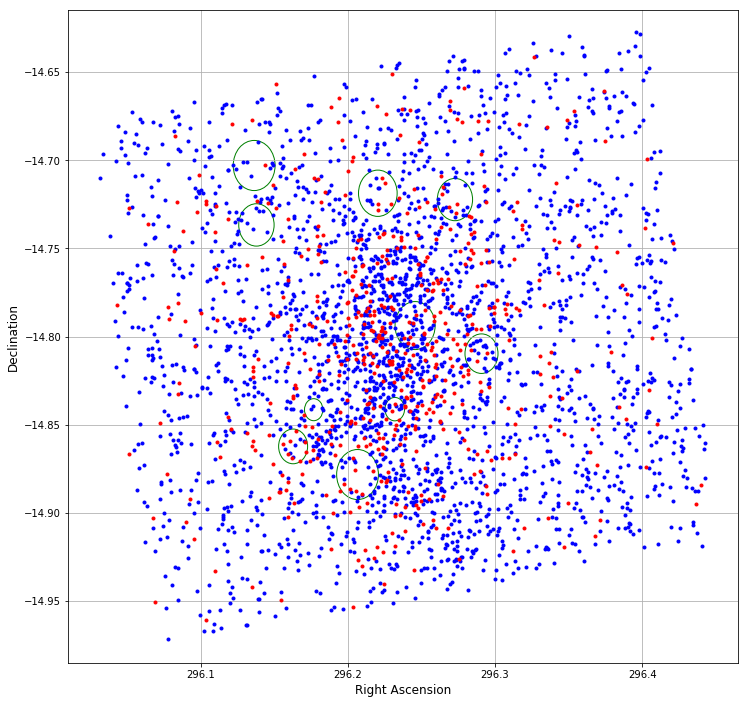

In [8]:





plt.figure(figsize=(12,12))
plt.plot(Orich.RA, Orich.Dec, '.', color='blue')
plt.plot(Crich.RA, Crich.Dec, '.', color='red')

# Plot the SF region circle in the image
circle0 = plt.Circle((ra_decSFR[0].ra.deg, ra_decSFR[0].dec.deg), radSFR[0].deg, color='green', fill=False)
circle1 = plt.Circle((ra_decSFR[1].ra.deg, ra_decSFR[1].dec.deg), radSFR[1].deg, color='green', fill=False)
circle2 = plt.Circle((ra_decSFR[2].ra.deg, ra_decSFR[2].dec.deg), radSFR[2].deg, color='green', fill=False)
circle3 = plt.Circle((ra_decSFR[3].ra.deg, ra_decSFR[3].dec.deg), radSFR[3].deg, color='green', fill=False)
circle4 = plt.Circle((ra_decSFR[4].ra.deg, ra_decSFR[4].dec.deg), radSFR[4].deg, color='green', fill=False)
circle5 = plt.Circle((ra_decSFR[5].ra.deg, ra_decSFR[5].dec.deg), radSFR[5].deg, color='green', fill=False)
circle6 = plt.Circle((ra_decSFR[6].ra.deg, ra_decSFR[6].dec.deg), radSFR[6].deg, color='green', fill=False)
circle7 = plt.Circle((ra_decSFR[7].ra.deg, ra_decSFR[7].dec.deg), radSFR[7].deg, color='green', fill=False)
circle8 = plt.Circle((ra_decSFR[8].ra.deg, ra_decSFR[8].dec.deg), radSFR[8].deg, color='green', fill=False)
circle9 = plt.Circle((ra_decSFR[9].ra.deg, ra_decSFR[9].dec.deg), radSFR[9].deg, color='green', fill=False)
circle10 = plt.Circle((ra_decSFR[10].ra.deg, ra_decSFR[10].dec.deg), radSFR[10].deg, color='green', fill=False)

# Add the circles to the immage
plt.gcf().gca().add_artist(circle0)
plt.gcf().gca().add_artist(circle1)
plt.gcf().gca().add_artist(circle2)
plt.gcf().gca().add_artist(circle3)
plt.gcf().gca().add_artist(circle4)
plt.gcf().gca().add_artist(circle5)
plt.gcf().gca().add_artist(circle6)
plt.gcf().gca().add_artist(circle7)
plt.gcf().gca().add_artist(circle8)
plt.gcf().gca().add_artist(circle9)
plt.gcf().gca().add_artist(circle10)

plt.xlim(296.01, 296.465)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


In [9]:

# Where's the center of NGC 6822?
# RA = 19 44 56, Dec = -14 48 06 (from Sibbons+2012)

NGC6822_center = SkyCoord("19h44m56s-14d48m06s")
print(NGC6822_center)

Orich_upper_left = Orich[(Orich.RA < NGC6822_center.ra) & (Orich.Dec > NGC6822_center.dec)]
Crich_upper_left = Crich[(Crich.RA < NGC6822_center.ra) & (Crich.Dec > NGC6822_center.dec)]

Orich_upper_right = Orich[(Orich.RA > NGC6822_center.ra) & (Orich.Dec > NGC6822_center.dec)]
Crich_upper_right = Crich[(Crich.RA > NGC6822_center.ra) & (Crich.Dec > NGC6822_center.dec)]

Orich_lower_left = Orich[(Orich.RA < NGC6822_center.ra) & (Orich.Dec < NGC6822_center.dec)]
Crich_lower_left = Crich[(Crich.RA < NGC6822_center.ra) & (Crich.Dec < NGC6822_center.dec)]

Orich_lower_right = Orich[(Orich.RA > NGC6822_center.ra) & (Orich.Dec < NGC6822_center.dec)]
Crich_lower_right = Crich[(Crich.RA > NGC6822_center.ra) & (Crich.Dec < NGC6822_center.dec)]

print(len(Orich_upper_left))
print(len(Crich_upper_left))
print(len(Orich_upper_right))
print(len(Crich_upper_right))
print(len(Orich_lower_left))
print(len(Crich_lower_left))
print(len(Orich_lower_right))
print(len(Crich_lower_right))



<SkyCoord (ICRS): (ra, dec) in deg
    (296.23333333, -14.80166667)>
582
142
646
127
666
160
689
134


(0.24398625429553264, 0.022836470295739833)
(-1.102061719074589, 0.14559040294585235, 0.13564072230559843)


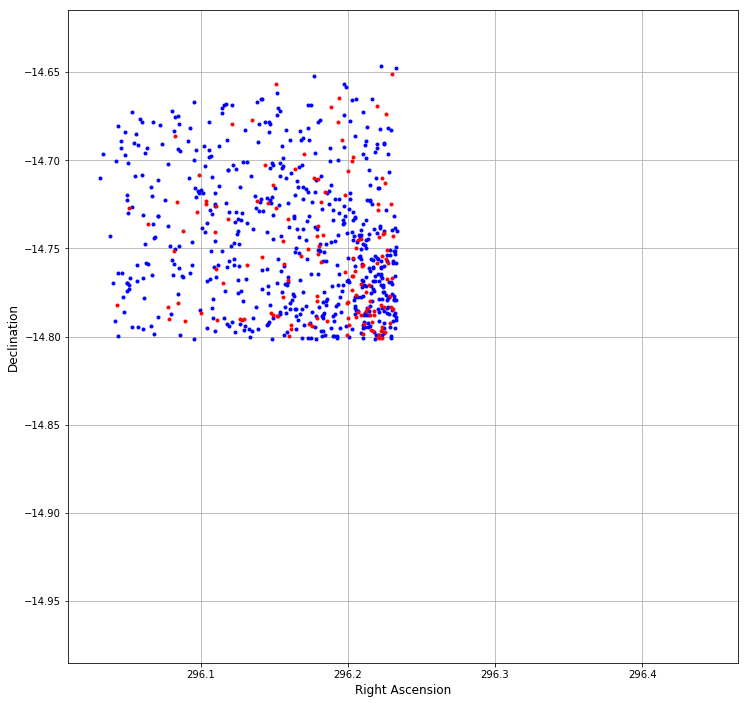

In [10]:


ratio_C_O_upper_left = c2o_calc(len(Crich_upper_left), len(Orich_upper_left))
print(ratio_C_O_upper_left)

ratio_Fe_H_upper_left = metallicity_calc(ratio_C_O_upper_left[0], ratio_C_O_upper_left[1])
print(ratio_Fe_H_upper_left)

##########

plt.figure(figsize=(12,12))
plt.plot(Orich_upper_left.RA, Orich_upper_left.Dec, '.', color='blue')
plt.plot(Crich_upper_left.RA, Crich_upper_left.Dec, '.', color='red')

plt.xlim(296.01, 296.465)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


(0.19659442724458204, 0.01908283215557167)
(-1.05797846539161, 0.15591923128058083, 0.14552914645146497)


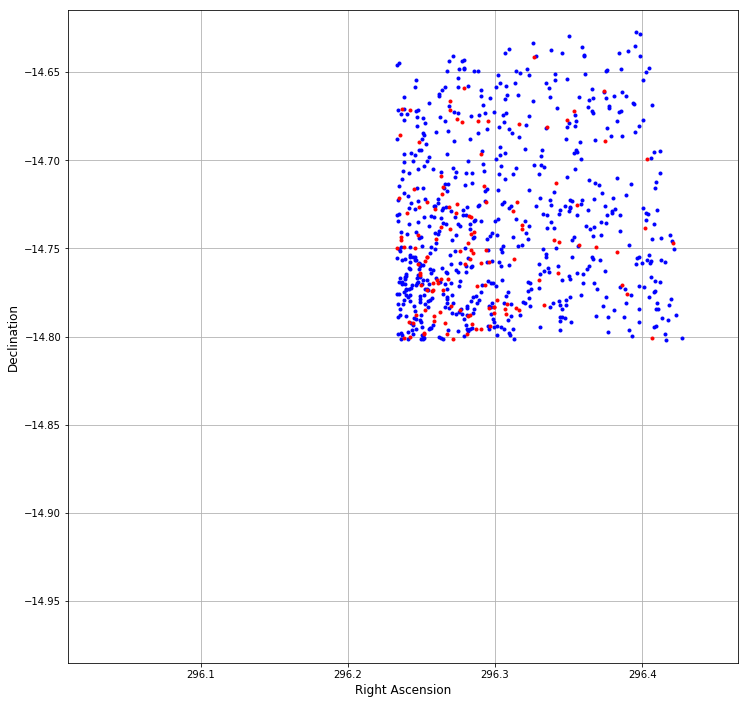

In [11]:


ratio_C_O_upper_right = c2o_calc(len(Crich_upper_right), len(Orich_upper_right))
print(ratio_C_O_upper_right)

ratio_Fe_H_upper_right = metallicity_calc(ratio_C_O_upper_right[0], ratio_C_O_upper_right[1])
print(ratio_Fe_H_upper_right)

##########

plt.figure(figsize=(12,12))
plt.plot(Orich_upper_right.RA, Orich_upper_right.Dec, '.', color='blue')
plt.plot(Crich_upper_right.RA, Crich_upper_right.Dec, '.', color='red')

plt.xlim(296.01, 296.465)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


(0.24024024024024024, 0.021151378222401963)
(-1.0989035041382431, 0.14474993338173525, 0.13549440924409928)


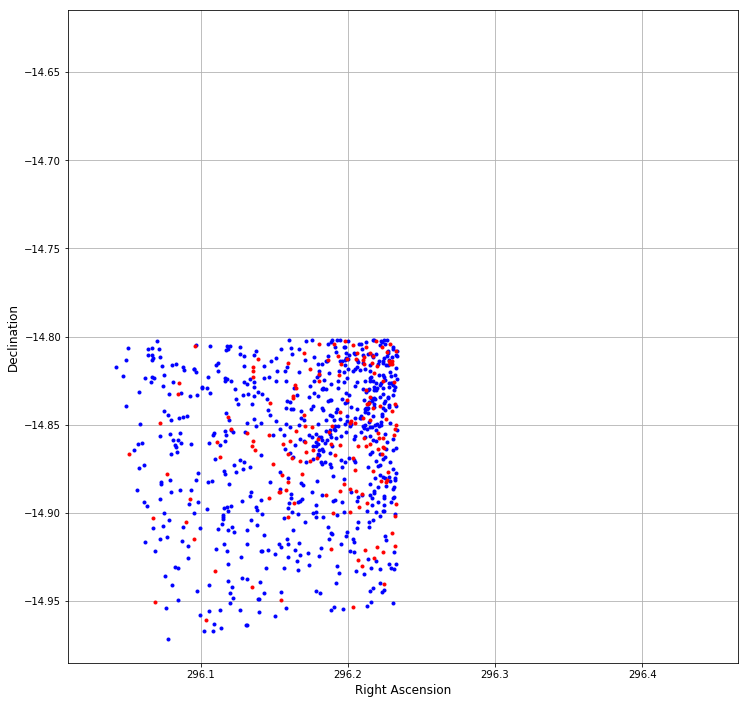

In [12]:


ratio_C_O_lower_left = c2o_calc(len(Crich_lower_left), len(Orich_lower_left))
print(ratio_C_O_lower_left)

ratio_Fe_H_lower_left = metallicity_calc(ratio_C_O_lower_left[0], ratio_C_O_lower_left[1])
print(ratio_Fe_H_lower_left)

##########

plt.figure(figsize=(12,12))
plt.plot(Orich_lower_left.RA, Orich_lower_left.Dec, '.', color='blue')
plt.plot(Crich_lower_left.RA, Crich_lower_left.Dec, '.', color='red')

plt.xlim(296.01, 296.465)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


(0.19448476052249636, 0.018362148017672553)
(-1.0557762209348753, 0.15566160315165356, 0.14560869735165904)


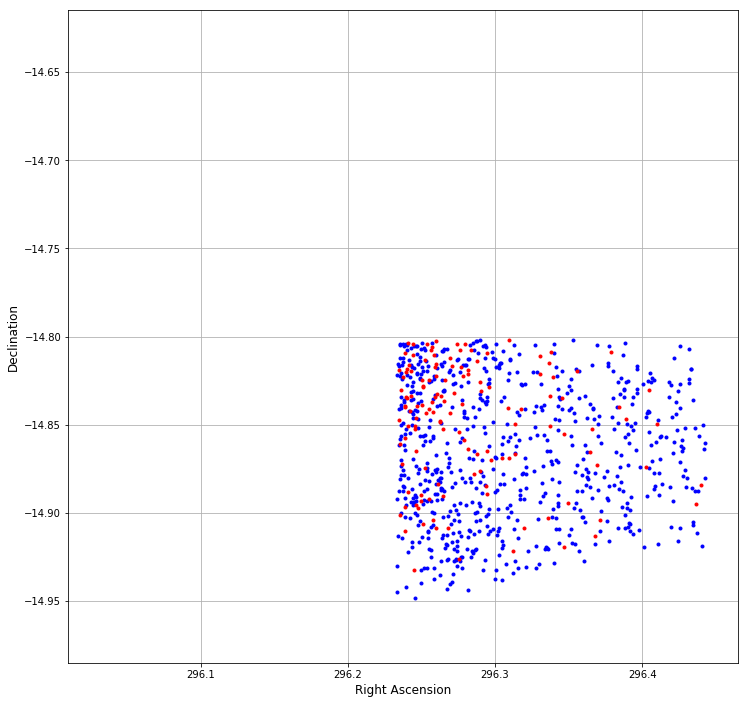

In [13]:


ratio_C_O_lower_right = c2o_calc(len(Crich_lower_right), len(Orich_lower_right))
print(ratio_C_O_lower_right)

ratio_Fe_H_lower_right = metallicity_calc(ratio_C_O_lower_right[0], ratio_C_O_lower_right[1])
print(ratio_Fe_H_lower_right)

##########

plt.figure(figsize=(12,12))
plt.plot(Orich_lower_right.RA, Orich_lower_right.Dec, '.', color='blue')
plt.plot(Crich_lower_right.RA, Crich_lower_right.Dec, '.', color='red')

plt.xlim(296.01, 296.465)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


In [14]:


# this is from the MASTER CATALOG, so all the stars.
# we should do it for just the C-rich and O-rich stars, too

raI2  = Angle(MASTERCAT.RA, unit=u.deg)
decI2 = Angle(MASTERCAT.Dec, unit=u.deg)
radec_I2 = SkyCoord(raI2, decI2, frame='fk5')

#radec = SkyCoord((MASTERCAT.RA, MASTERCAT.Dec), frame='fk5')

sepfromNGC6822 = NGC6822_center.separation(radec_I2)

#print(sepfromNGC6822)

in_galaxy1_idx = np.where(sepfromNGC6822.arcmin < 1.325)
in_galaxy2_idx = np.where((sepfromNGC6822.arcmin > 1.325) & (sepfromNGC6822.arcmin < 2.65))
in_galaxy3_idx = np.where((sepfromNGC6822.arcmin > 2.65) & (sepfromNGC6822.arcmin < 3.975))



sepfromNGC6822[in_galaxy1_idx]
sepfromNGC6822[in_galaxy2_idx]
sepfromNGC6822[in_galaxy3_idx]

print(len(sepfromNGC6822[in_galaxy1_idx]))
print(len(sepfromNGC6822[in_galaxy2_idx]))
print(len(sepfromNGC6822[in_galaxy3_idx]))



935
2489
3477


In [15]:

# C-rich stars only

Crichra  = Angle(Crich.RA, unit=u.deg)
Crichdec = Angle(Crich.Dec, unit=u.deg)
Crichradec = SkyCoord(Crichra, Crichdec, frame='fk5')

#radec = SkyCoord((Crich.RA, Crich.Dec), frame='fk5')

CrichsepfromNGC6822 = NGC6822_center.separation(Crichradec)

#print(sepfromNGC6822)

Crich_in_galaxy1_idx = np.where(CrichsepfromNGC6822.arcmin < 1.325)
Crich_in_galaxy2_idx = np.where((CrichsepfromNGC6822.arcmin > 1.325) & (CrichsepfromNGC6822.arcmin < 2.65))
Crich_in_galaxy3_idx = np.where((CrichsepfromNGC6822.arcmin > 2.65) & (CrichsepfromNGC6822.arcmin < 3.975))
Crich_in_galaxy4_idx = np.where((CrichsepfromNGC6822.arcmin > 3.975) & (CrichsepfromNGC6822.arcmin < 5.3))
Crich_in_galaxy5_idx = np.where((CrichsepfromNGC6822.arcmin > 5.3) & (CrichsepfromNGC6822.arcmin < 6.625))
Crich_in_galaxy6_idx = np.where((CrichsepfromNGC6822.arcmin > 6.625) & (CrichsepfromNGC6822.arcmin < 7.95))


Crich1 = CrichsepfromNGC6822[Crich_in_galaxy1_idx]
Crich2 = CrichsepfromNGC6822[Crich_in_galaxy2_idx]
Crich3 = CrichsepfromNGC6822[Crich_in_galaxy3_idx]
Crich4 = CrichsepfromNGC6822[Crich_in_galaxy4_idx]
Crich5 = CrichsepfromNGC6822[Crich_in_galaxy5_idx]
Crich6 = CrichsepfromNGC6822[Crich_in_galaxy6_idx]


print(len(CrichsepfromNGC6822[Crich_in_galaxy1_idx]))
print(len(CrichsepfromNGC6822[Crich_in_galaxy2_idx]))
print(len(CrichsepfromNGC6822[Crich_in_galaxy3_idx]))
print(len(CrichsepfromNGC6822[Crich_in_galaxy4_idx]))
print(len(CrichsepfromNGC6822[Crich_in_galaxy5_idx]))
print(len(CrichsepfromNGC6822[Crich_in_galaxy6_idx]))



52
93
110
87
85
54


In [16]:

# O-rich stars only

Orichra  = Angle(Orich.RA, unit=u.deg)
Orichdec = Angle(Orich.Dec, unit=u.deg)
Orichradec = SkyCoord(Orichra, Orichdec, frame='fk5')

#radec = SkyCoord((Orich.RA, Orich.Dec), frame='fk5')

OrichsepfromNGC6822 = NGC6822_center.separation(Orichradec)

#print(sepfromNGC6822)

Orich_in_galaxy1_idx = np.where(OrichsepfromNGC6822.arcmin < 1.325)
Orich_in_galaxy2_idx = np.where((OrichsepfromNGC6822.arcmin > 1.325) & (OrichsepfromNGC6822.arcmin < 2.65))
Orich_in_galaxy3_idx = np.where((OrichsepfromNGC6822.arcmin > 2.65) & (OrichsepfromNGC6822.arcmin < 3.975))
Orich_in_galaxy4_idx = np.where((OrichsepfromNGC6822.arcmin > 3.975) & (OrichsepfromNGC6822.arcmin < 5.3))
Orich_in_galaxy5_idx = np.where((OrichsepfromNGC6822.arcmin > 5.3) & (OrichsepfromNGC6822.arcmin < 6.625))
Orich_in_galaxy6_idx = np.where((OrichsepfromNGC6822.arcmin > 6.625) & (OrichsepfromNGC6822.arcmin < 7.95))


Orich1 = OrichsepfromNGC6822[Orich_in_galaxy1_idx]
Orich2 = OrichsepfromNGC6822[Orich_in_galaxy2_idx]
Orich3 = OrichsepfromNGC6822[Orich_in_galaxy3_idx]
Orich4 = OrichsepfromNGC6822[Orich_in_galaxy4_idx]
Orich5 = OrichsepfromNGC6822[Orich_in_galaxy5_idx]
Orich6 = OrichsepfromNGC6822[Orich_in_galaxy6_idx]


print(len(OrichsepfromNGC6822[Orich_in_galaxy1_idx]))
print(len(OrichsepfromNGC6822[Orich_in_galaxy2_idx]))
print(len(OrichsepfromNGC6822[Orich_in_galaxy3_idx]))
print(len(OrichsepfromNGC6822[Orich_in_galaxy4_idx]))
print(len(OrichsepfromNGC6822[Orich_in_galaxy5_idx]))
print(len(OrichsepfromNGC6822[Orich_in_galaxy6_idx]))



128
310
330
333
308
353


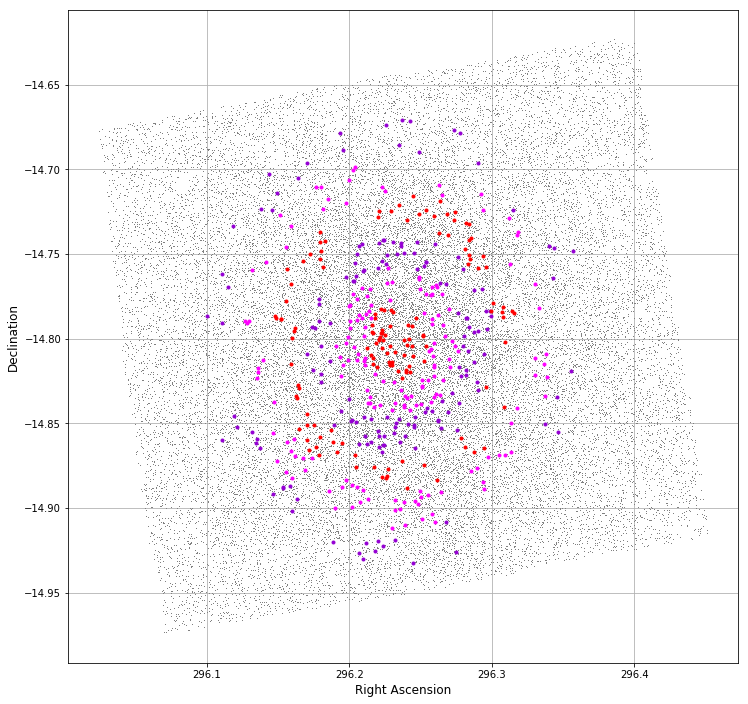

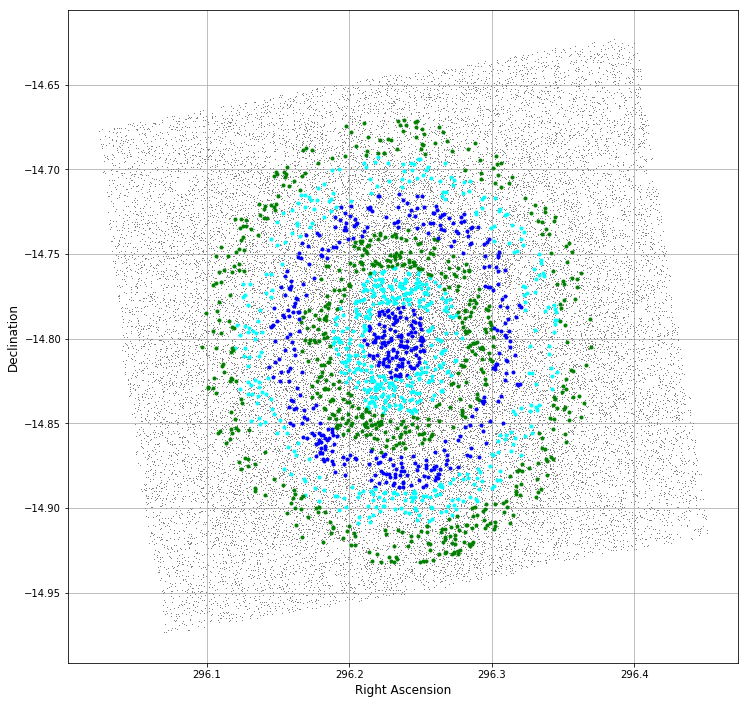

In [17]:


# for radial annuli,
# quarter-light radius, half-light radius, three-quarters-light radius?
# NGC 6822 size in arcmintes 15.5 arcminutes x 13.5 arcminutes
# half-light radius: 2.65 arcminutes
# inclination 40 degrees
# TRGB(I) = 19.76
# red clump(I) = 23.5

Crichastropytable = Table.from_pandas(Crich)

Crichtest = Crichastropytable[Crich_in_galaxy1_idx]

Crich1 = Crichtest.to_pandas()

##########

Orichastropytable = Table.from_pandas(Orich)

Orichtest = Orichastropytable[Orich_in_galaxy1_idx]

Orich1 = Orichtest.to_pandas()


##########

plt.figure(figsize=(12,12))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')

plt.plot(Crichastropytable[Crich_in_galaxy1_idx]['RA'], Crichastropytable[Crich_in_galaxy1_idx]['Dec'], '.', color='red')
plt.plot(Crichastropytable[Crich_in_galaxy2_idx]['RA'], Crichastropytable[Crich_in_galaxy2_idx]['Dec'], '.', color='magenta')
plt.plot(Crichastropytable[Crich_in_galaxy3_idx]['RA'], Crichastropytable[Crich_in_galaxy3_idx]['Dec'], '.', color='darkviolet')
plt.plot(Crichastropytable[Crich_in_galaxy4_idx]['RA'], Crichastropytable[Crich_in_galaxy4_idx]['Dec'], '.', color='red')
plt.plot(Crichastropytable[Crich_in_galaxy5_idx]['RA'], Crichastropytable[Crich_in_galaxy5_idx]['Dec'], '.', color='magenta')
plt.plot(Crichastropytable[Crich_in_galaxy6_idx]['RA'], Crichastropytable[Crich_in_galaxy6_idx]['Dec'], '.', color='darkviolet')


plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
#plt.show()
#plt.close()

##########

plt.figure(figsize=(12,12))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')

plt.plot(Orichastropytable[Orich_in_galaxy1_idx]['RA'], Orichastropytable[Orich_in_galaxy1_idx]['Dec'], '.', color='blue')
plt.plot(Orichastropytable[Orich_in_galaxy2_idx]['RA'], Orichastropytable[Orich_in_galaxy2_idx]['Dec'], '.', color='cyan')
plt.plot(Orichastropytable[Orich_in_galaxy3_idx]['RA'], Orichastropytable[Orich_in_galaxy3_idx]['Dec'], '.', color='green')
plt.plot(Orichastropytable[Orich_in_galaxy4_idx]['RA'], Orichastropytable[Orich_in_galaxy4_idx]['Dec'], '.', color='blue')
plt.plot(Orichastropytable[Orich_in_galaxy5_idx]['RA'], Orichastropytable[Orich_in_galaxy5_idx]['Dec'], '.', color='cyan')
plt.plot(Orichastropytable[Orich_in_galaxy6_idx]['RA'], Orichastropytable[Orich_in_galaxy6_idx]['Dec'], '.', color='green')



plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()

In [18]:
ratio_C_O = c2o_calc(len(Crichastropytable[Crich_in_galaxy1_idx]), len(Orichastropytable[Orich_in_galaxy1_idx]))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)

print('')
print('')

ratio_C_O = c2o_calc(len(Crichastropytable[Crich_in_galaxy2_idx]), len(Orichastropytable[Orich_in_galaxy2_idx]))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)

print('')
print('')

ratio_C_O = c2o_calc(len(Crichastropytable[Crich_in_galaxy3_idx]), len(Orichastropytable[Orich_in_galaxy3_idx]))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)

print('')
print('')


ratio_C_O = c2o_calc(len(Crichastropytable[Crich_in_galaxy4_idx]), len(Orichastropytable[Orich_in_galaxy4_idx]))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)

print('')
print('')

ratio_C_O = c2o_calc(len(Crichastropytable[Crich_in_galaxy5_idx]), len(Orichastropytable[Orich_in_galaxy5_idx]))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)

print('')
print('')

ratio_C_O = c2o_calc(len(Crichastropytable[Crich_in_galaxy6_idx]), len(Orichastropytable[Orich_in_galaxy6_idx]))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)


##### NB: when printing out into a file, give each index its own name
##### for both the C/O and the Fe/H

(0.40625, 0.06680715381440261)

(-1.2061328857738574, 0.14359588941513146, 0.12358515158894612)


(0.3, 0.03546920518039602)

(-1.1442469897182412, 0.14343553472430326, 0.13024449437961683)


(0.3333333333333333, 0.03669879217087869)

(-1.1657530102817586, 0.1365866296515541, 0.12449557894657937)


(0.26126126126126126, 0.031457044828791844)

(-1.1160252589827802, 0.1500512030687564, 0.1365611978379091)


(0.275974025974026, 0.033812685363840675)

(-1.1272080583305086, 0.14826831536602225, 0.13448517184370856)


(0.1529745042492918, 0.022352804844541413)

(-1.0067709555845186, 0.18064221766271937, 0.16345338433460466)
